### 一、用 statsmodel 实现逻辑回归

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit, Probit, MNLogit

import warnings
import matplotlib as mpl
warnings.filterwarnings('ignore')

In [63]:
data1['return'].describe()

count    28722.000000
mean         0.242012
std          0.796771
min         -0.866142
25%         -0.225824
50%          0.035917
75%          0.455112
max         21.526315
Name: return, dtype: float64

### 1、读取数据

In [64]:
data=pd.read_csv('../data/book_ff.csv',index_col=0)
data=data[data['return']<3]
# data[['ir','nasdaq15_pos', 'lrassets','vc','odate']]
data.columns
data[['Stkcd', 'year', 'FF', 'size', 'lev', 'shangyu', 'dta','sales', 'profit',
       'loss', 'Current_asset_ratio', 'Turnover_tax_rate',
       'Minority_shareholder_profit', 'Indcd', 'roa', 'roa1', 'roa2', 'dtaABS',
       'TobinQ', 'return', 'dual', 'DirSize', 'DirRatio', 
       'InsSh1', 'Hld5']]

,Stkcd,year,FF,size,lev,shangyu,dta,sales,profit,loss,...,roa1,roa2,dtaABS,TobinQ,return,dual,DirSize,DirRatio,InsSh1,Hld5
0,1,1999,0.0,24.549055,0.936758,NaN,NaN,1.471221e+09,5.551911e+08,0.0,...,0.008235,0.004676,NaN,1.363763,0.197169,2.0,2.397895,0.000000,28.07,27.66
1,1,2000,0.0,24.931348,0.929510,NaN,NaN,1.431286e+09,5.065518e+08,0.0,...,0.004676,0.003907,NaN,1.250423,-0.047441,2.0,2.397895,0.000000,26.86,25.54
2,1,2001,0.0,25.511815,0.969801,NaN,NaN,2.118441e+09,4.023604e+08,0.0,...,0.003907,0.001911,NaN,1.121847,-0.156336,2.0,2.639057,21.428571,26.66,24.06
3,1,2002,0.0,25.836255,0.977324,NaN,NaN,3.077099e+09,4.322249e+08,0.0,...,0.001911,0.002440,NaN,1.072548,-0.135145,NaN,2.708050,20.000000,26.55,21.81
4,1,2003,0.0,25.985184,0.979440,NaN,NaN,3.128836e+09,3.165457e+08,0.0,...,0.002440,0.002944,NaN,1.047299,-0.175335,2.0,2.639057,21.428571,24.81,21.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55630,688819,2022,0.0,24.200732,0.565335,4.991181e+05,7.808557e+08,4.188237e+10,1.838898e+09,0.0,...,NaN,NaN,1.262016,1.088361,-0.126924,2.0,2.197225,33.333333,87.98,85.14
55632,688981,2021,0.0,26.161053,0.295556,NaN,9.311400e+07,3.563063e+10,1.120250e+10,0.0,...,0.048383,NaN,NaN,1.264438,-0.082424,NaN,2.833213,29.411765,22.91,77.88
55633,688981,2022,0.0,26.443918,0.338898,NaN,9.920500e+07,4.951608e+10,1.465353e+10,0.0,...,NaN,NaN,0.838409,1.100394,-0.223627,2.0,2.564949,38.461538,27.63,78.07
55635,689009,2021,0.0,22.760901,0.443086,1.222623e+08,6.316021e+07,9.146054e+09,4.080007e+08,0.0,...,0.060199,NaN,NaN,1.056057,-0.183524,2.0,2.484907,33.333333,0.00,39.20


### 2、二分类

In [65]:
y='il'
data[y]=1*(data['FF']>0)
data.columns

Index(['Stkcd', 'year', 'FF', 'OF', 'LF', 'Fraud', 'ShortName', 'Accper',
       'Typrep', 'size', 'lev', 'shangyu', 'dta', 'month', 'sales', 'profit',
       'loss', 'Current_asset_ratio', 'Turnover_tax_rate',
       'Minority_shareholder_profit', 'Indcd', 'roa', 'roa1', 'roa2', 'dtaABS',
       'TobinQ', 'Trdynt', 'return', 'dual', 'DirSize', 'DirRatio', 'Reptdt',
       'InsSh1', 'Hld5', 'Astock', 'il'],
      dtype='object')

### 2.1 线性回归

In [66]:
col=['size', 'lev', 'shangyu', 'dta','dtaABS']
data1=data.dropna(subset=col)
data1=data1.dropna(subset=[y])
# 准备数据
X = data1[col]  # 自变量
y1 = data1[y]  # 因变量

# 添加常数项（截距）
X = sm.add_constant(X)

# 执行OLS回归
model = sm.OLS(y1, X).fit()

# 输出回归结果
print(model.summary())

# 提取系数和截距
intercept = model.params['const']  # 截距项
coefficient = model.params[col]   # 回归系数

print(f"\n回归结果：")
print(f"截距项 (intercept) = {intercept:.6f}")
# print(f"回归系数 (coefficient) = {coefficient:.6f}")

                            OLS Regression Results                            
Dep. Variable:                     il   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     59.77
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           3.82e-62
Time:                        19:48:08   Log-Likelihood:                -13452.
No. Observations:               28387   AIC:                         2.692e+04
Df Residuals:                   28381   BIC:                         2.696e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6717      0.040     16.881      0.0

In [67]:
 data1['pred']=model.predict(X)

线性回归分析结果
回归方程: il = -0.0240 × abdta + 0.2193
R² 得分: 0.0011
RMSE: 0.3905
样本数量: 28387


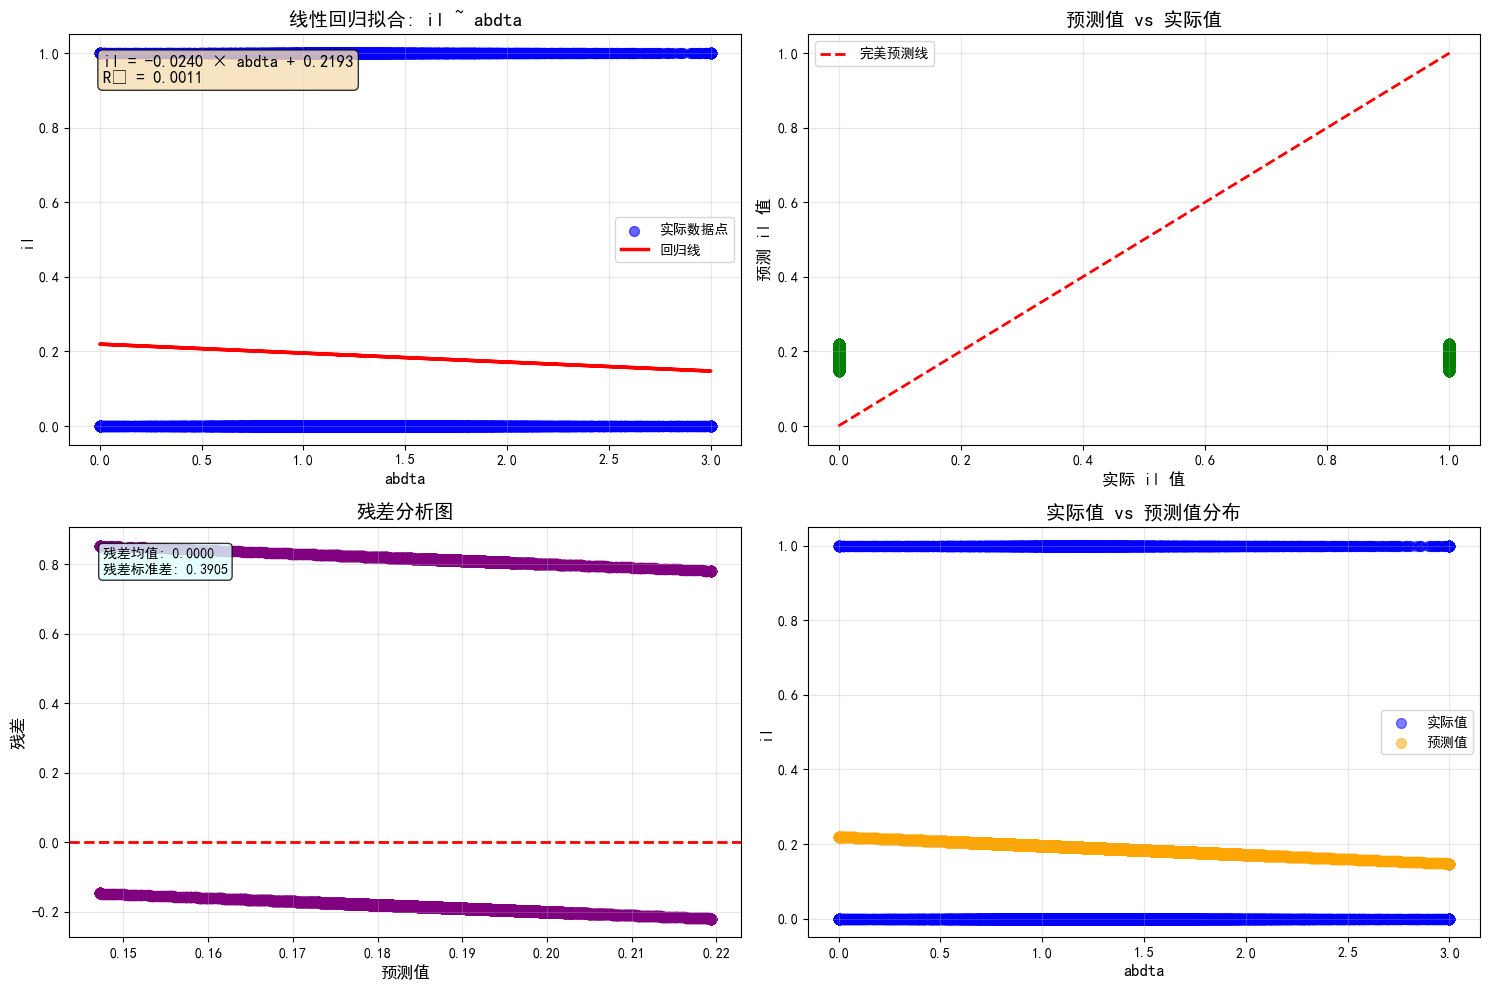

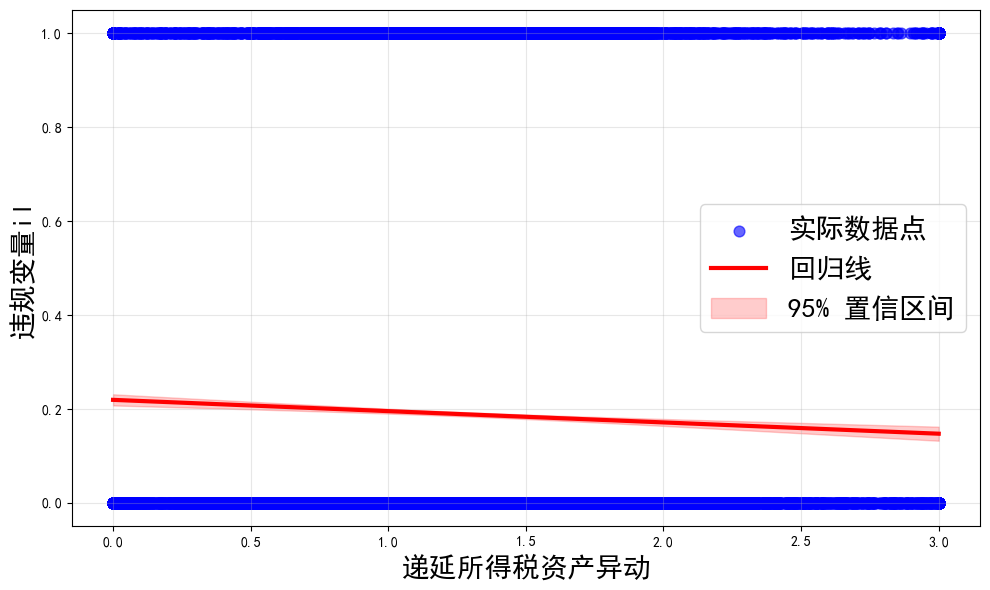


数据基本统计信息:
abdta - 均值: 1.3046, 标准差: 0.5397, 范围: [0.0000, 3.0000]
il - 均值: 0.1880, 标准差: 0.3907, 范围: [0.0000, 1.0000]


In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 假设你已经有了data1数据框
# 如果还没有读取数据，可以使用：
# data1 = pd.read_csv('your_file.csv')  # 根据实际文件格式调整

# 提取自变量和因变量
x = data1['dtaABS'].values  # 自变量
y = data1['il'].values  # 因变量

# 重塑x为二维数组（sklearn要求）
X = x.reshape(-1, 1)

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X, y)

# 进行预测
y_pred = model.predict(X)

# 获取模型参数
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# 打印模型信息
print("=" * 50)
print("线性回归分析结果")
print("=" * 50)
print(f"回归方程: il = {slope:.4f} × abdta + {intercept:.4f}")
print(f"R² 得分: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"样本数量: {len(x)}")
print("=" * 50)

# 绘制综合图形
plt.figure(figsize=(15, 10))

# 子图1：原始数据和回归线
plt.subplot(2, 2, 1)
plt.scatter(x, y, alpha=0.6, label='实际数据点', color='blue', s=50)
plt.plot(x, y_pred, color='red', linewidth=2.5, label='回归线')
plt.xlabel('abdta', fontsize=12)
plt.ylabel('il', fontsize=12)
plt.title('线性回归拟合: il ~ abdta', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 在图中添加回归方程
equation_text = f'il = {slope:.4f} × abdta + {intercept:.4f}\nR² = {r2:.4f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 子图2：预测值 vs 真实值
plt.subplot(2, 2, 2)
plt.scatter(y, y_pred, alpha=0.6, color='green', s=50)
# 绘制完美预测线（y=x）
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='完美预测线')
plt.xlabel('实际 il 值', fontsize=12)
plt.ylabel('预测 il 值', fontsize=12)
plt.title('预测值 vs 实际值', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 子图3：残差图
plt.subplot(2, 2, 3)
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', s=50)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('预测值', fontsize=12)
plt.ylabel('残差', fontsize=12)
plt.title('残差分析图', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# 添加残差统计信息
residual_stats = f'残差均值: {residuals.mean():.4f}\n残差标准差: {residuals.std():.4f}'
plt.text(0.05, 0.95, residual_stats, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))

# 子图4：数据分布对比
plt.subplot(2, 2, 4)
plt.scatter(x, y, alpha=0.5, label='实际值', color='blue', s=50)
plt.scatter(x, y_pred, alpha=0.5, label='预测值', color='orange', s=50)
plt.xlabel('abdta', fontsize=12)
plt.ylabel('il', fontsize=12)
plt.title('实际值 vs 预测值分布', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 额外：绘制拟合效果更好的散点图与回归线
plt.figure(figsize=(10, 6))

# 按x值排序以便绘制平滑的回归线
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(x, y, alpha=0.6, color='blue', s=60, label='实际数据点')
plt.plot(x_sorted, y_pred_sorted, color='red', linewidth=3, label='回归线', zorder=5)

# 添加置信区间（简单版本）
# 计算预测值的标准误差
n = len(x)
x_mean = np.mean(x)
Sxx = np.sum((x - x_mean) ** 2)
standard_errors = np.sqrt(np.sum(residuals**2) / (n-2) * (1/n + (x - x_mean)**2 / Sxx))

# 绘制置信区间
plt.fill_between(x_sorted, y_pred_sorted - 1.96*standard_errors[sorted_indices], 
                 y_pred_sorted + 1.96*standard_errors[sorted_indices], 
                 alpha=0.2, color='red', label='95% 置信区间')

plt.xlabel('递延所得税资产异动', fontsize=20)
plt.ylabel('违规变量il', fontsize=20)
# plt.title('违规变量il 关于 abdta 的线性回归分析', fontsize=16, fontweight='bold')
plt.legend(fontsize=20)
plt.grid(True, alpha=0.3)

# 添加统计信息框
# stats_text = f'回归方程: il = {slope:.4f} × abdta + {intercept:.4f}\nR² = {r2:.4f}\n样本数: {n}'
# plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
#          fontsize=11, verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.savefig('./3-3-a.png')
plt.show()

# 输出数据的基本统计信息
print("\n数据基本统计信息:")
print(f"abdta - 均值: {x.mean():.4f}, 标准差: {x.std():.4f}, 范围: [{x.min():.4f}, {x.max():.4f}]")
print(f"il - 均值: {y.mean():.4f}, 标准差: {y.std():.4f}, 范围: [{y.min():.4f}, {y.max():.4f}]")

线性回归分析结果
回归方程: il = -0.5120 × return + 0.2047
R² 得分: 0.0235
RMSE: 0.3861
样本数量: 28387


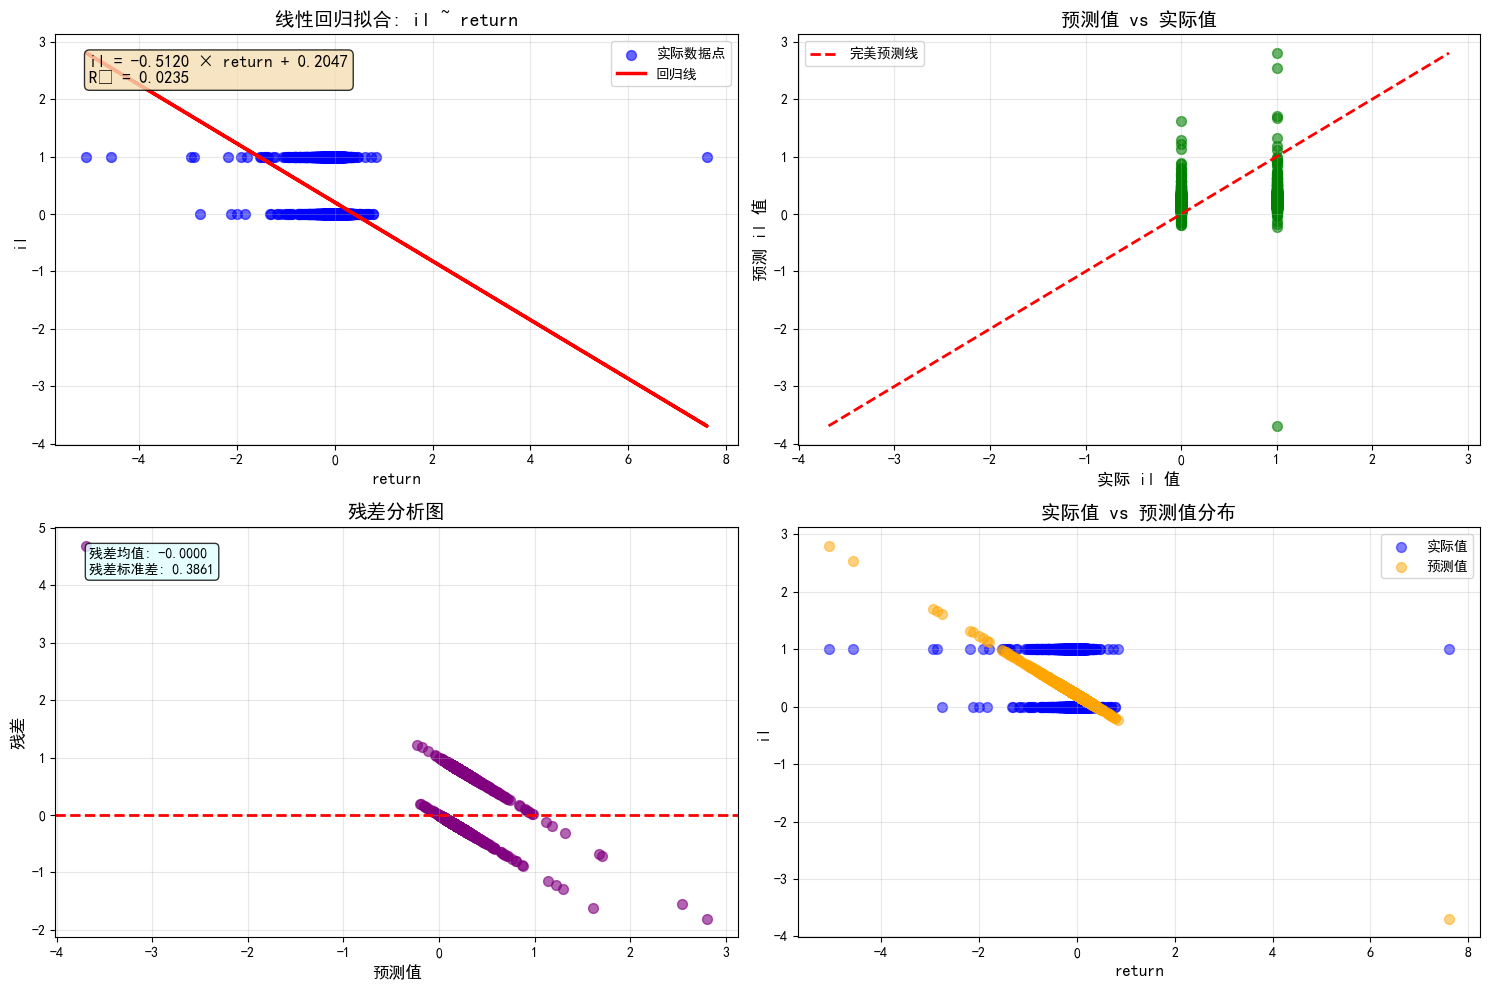

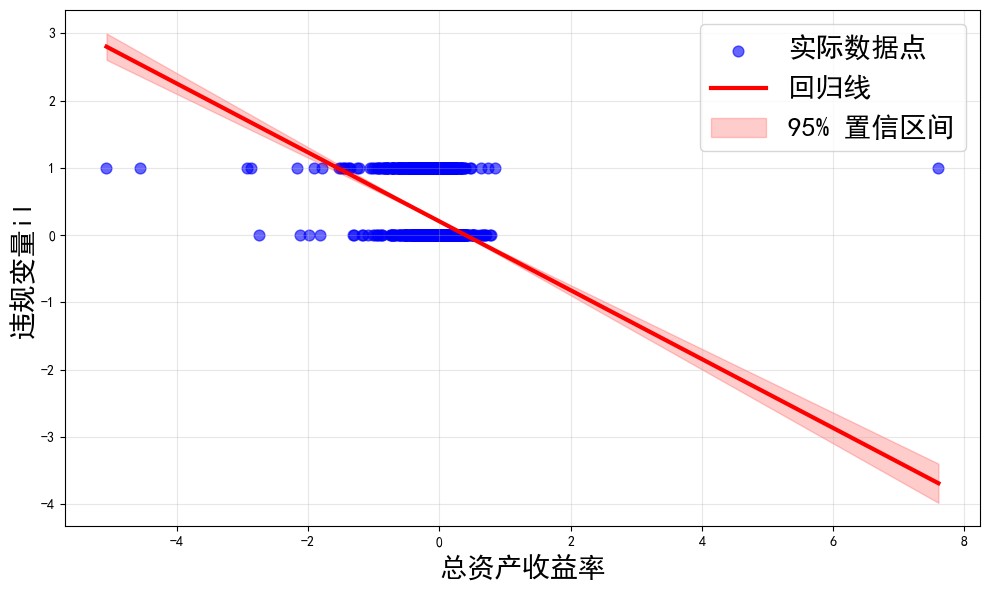


数据基本统计信息:
return - 均值: 0.0326, 标准差: 0.1169, 范围: [-5.0733, 7.6038]
il - 均值: 0.1880, 标准差: 0.3907, 范围: [0.0000, 1.0000]


In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 假设你已经有了data1数据框
# 如果还没有读取数据，可以使用：
# data1 = pd.read_csv('your_file.csv')  # 根据实际文件格式调整

# 提取自变量和因变量
col=['size', 'lev', 'shangyu', 'dta','dtaABS','return','roa']
y='il'
data1=data.dropna(subset=col)
data1=data1.dropna(subset=[y])
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 假设你已经有了data1数据框
# 如果还没有读取数据，可以使用：
# data1 = pd.read_csv('your_file.csv')  # 根据实际文件格式调整

# 提取自变量和因变量
data2=data1.copy()
data2['return']=data2['roa']
x = data2['return'].values  # 自变量
y = data2['il'].values  # 因变量

# 重塑x为二维数组（sklearn要求）
X = x.reshape(-1, 1)

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X, y)

# 进行预测
y_pred = model.predict(X)

# 获取模型参数
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# 打印模型信息
print("=" * 50)
print("线性回归分析结果")
print("=" * 50)
print(f"回归方程: il = {slope:.4f} × return + {intercept:.4f}")
print(f"R² 得分: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"样本数量: {len(x)}")
print("=" * 50)

# 绘制综合图形
plt.figure(figsize=(15, 10))

# 子图1：原始数据和回归线
plt.subplot(2, 2, 1)
plt.scatter(x, y, alpha=0.6, label='实际数据点', color='blue', s=50)
plt.plot(x, y_pred, color='red', linewidth=2.5, label='回归线')
plt.xlabel('return', fontsize=12)
plt.ylabel('il', fontsize=12)
plt.title('线性回归拟合: il ~ return', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 在图中添加回归方程
equation_text = f'il = {slope:.4f} × return + {intercept:.4f}\nR² = {r2:.4f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, 
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 子图2：预测值 vs 真实值
plt.subplot(2, 2, 2)
plt.scatter(y, y_pred, alpha=0.6, color='green', s=50)
# 绘制完美预测线（y=x）
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='完美预测线')
plt.xlabel('实际 il 值', fontsize=12)
plt.ylabel('预测 il 值', fontsize=12)
plt.title('预测值 vs 实际值', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 子图3：残差图
plt.subplot(2, 2, 3)
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', s=50)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('预测值', fontsize=12)
plt.ylabel('残差', fontsize=12)
plt.title('残差分析图', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# 添加残差统计信息
residual_stats = f'残差均值: {residuals.mean():.4f}\n残差标准差: {residuals.std():.4f}'
plt.text(0.05, 0.95, residual_stats, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))

# 子图4：数据分布对比
plt.subplot(2, 2, 4)
plt.scatter(x, y, alpha=0.5, label='实际值', color='blue', s=50)
plt.scatter(x, y_pred, alpha=0.5, label='预测值', color='orange', s=50)
plt.xlabel('return', fontsize=12)
plt.ylabel('il', fontsize=12)
plt.title('实际值 vs 预测值分布', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 额外：绘制拟合效果更好的散点图与回归线
plt.figure(figsize=(10, 6))

# 按x值排序以便绘制平滑的回归线
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

plt.scatter(x, y, alpha=0.6, color='blue', s=60, label='实际数据点')
plt.plot(x_sorted, y_pred_sorted, color='red', linewidth=3, label='回归线', zorder=5)

# 添加置信区间（简单版本）
# 计算预测值的标准误差
n = len(x)
x_mean = np.mean(x)
Sxx = np.sum((x - x_mean) ** 2)
standard_errors = np.sqrt(np.sum(residuals**2) / (n-2) * (1/n + (x - x_mean)**2 / Sxx))

# 绘制置信区间
plt.fill_between(x_sorted, y_pred_sorted - 1.96*standard_errors[sorted_indices], 
                 y_pred_sorted + 1.96*standard_errors[sorted_indices], 
                 alpha=0.2, color='red', label='95% 置信区间')

plt.xlabel('总资产收益率', fontsize=20)
plt.ylabel('违规变量il', fontsize=20)
# plt.title('违规变量il 关于 return 的线性回归分析', fontsize=16, fontweight='bold')
plt.legend(fontsize=20)
plt.grid(True, alpha=0.3)

# 添加统计信息框
# stats_text = f'回归方程: il = {slope:.4f} × return + {intercept:.4f}\nR² = {r2:.4f}\n样本数: {n}'
# plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
#          fontsize=11, verticalalignment='top',
#          bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.savefig('./3-3-b.png')
plt.show()

# 输出数据的基本统计信息
print("\n数据基本统计信息:")
print(f"return - 均值: {x.mean():.4f}, 标准差: {x.std():.4f}, 范围: [{x.min():.4f}, {x.max():.4f}]")
print(f"il - 均值: {y.mean():.4f}, 标准差: {y.std():.4f}, 范围: [{y.min():.4f}, {y.max():.4f}]")

### 2.2 逻辑回归

In [70]:

# col=[]

X = data1[col]

Y = data1[y]
probit_model = Probit(Y, sm.add_constant(X))
result = probit_model.fit()
result.summary()

KeyError: "None of [Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n       ...\n       0, 1, 0, 0, 0, 0, 0, 1, 0, 0],\n      dtype='int32', length=28387)] are in the [columns]"

<Axes: >

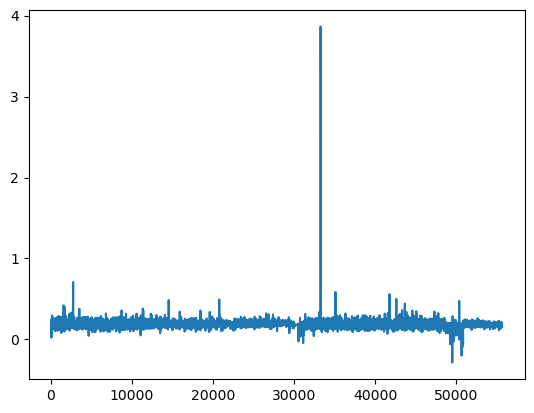

In [ ]:
data1['pred'].plot()

In [ ]:
logist_model = Logit(Y, sm.add_constant(X))
result = logist_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.473392
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  FF_g2   No. Observations:                28725
Model:                          Logit   Df Residuals:                    28719
Method:                           MLE   Df Model:                            5
Date:                Sun, 09 Nov 2025   Pseudo R-squ.:                 0.02018
Time:                        23:47:07   Log-Likelihood:                -13598.
converged:                       True   LL-Null:                       -13878.
Covariance Type:            nonrobust   LLR p-value:                8.211e-119
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8902      0.302      6.265      0.000       1.299       2.482
size          -0.1660      0.014    -11.958      0.000      -0.193      -0.139
lev            1.2200      0.074     16.535      0.000       1.075       1.365
shangyu     1.081e-10    1.2e-11      9.008      0.000    8.46e-11    1.32e-10
dta        -2.372e-10   4.21e-11     -5.637      0.000    -3.2e-10   -1.55e-10
dtaABS        -0.1873      0.028     -6.803      0.000      -0.241      -0.133
==============================================================================
"""

线性回归模型: y = 2.52x + 0.74
R² 得分: 0.9672
真实模型: y = 2.5x + 1.0


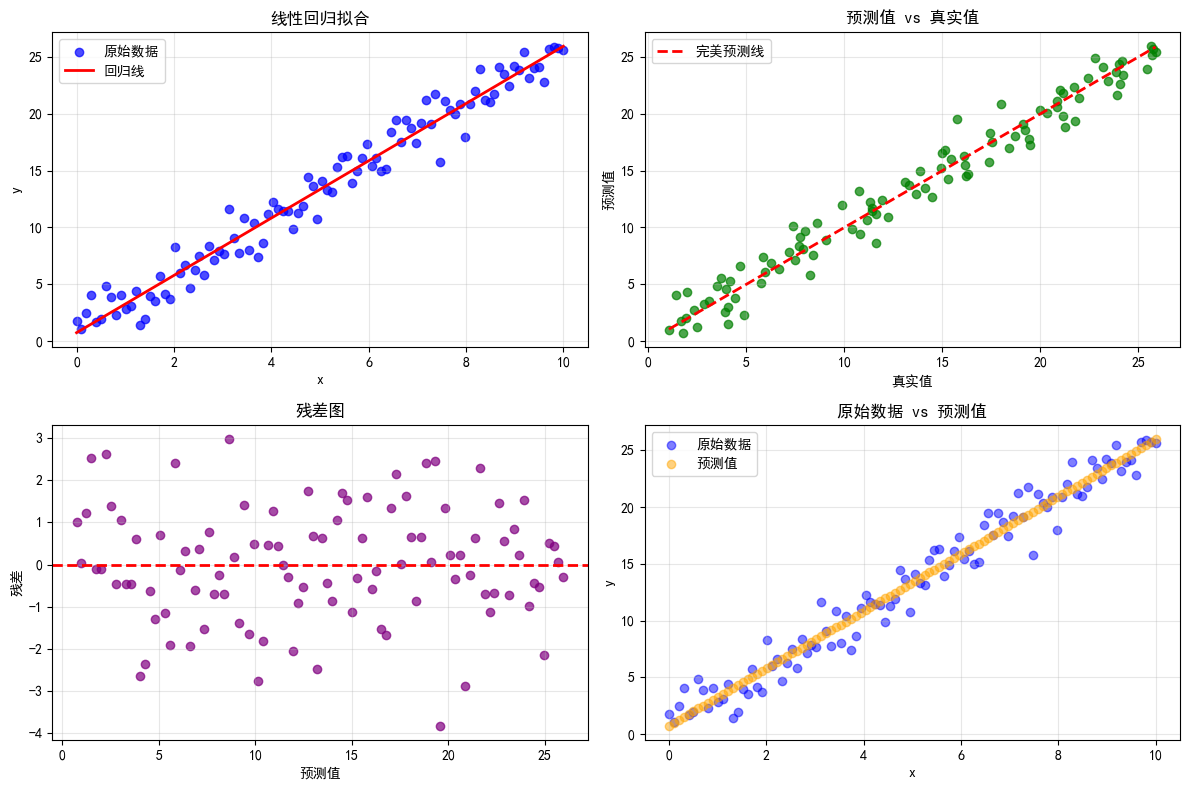

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 生成示例数据
np.random.seed(42)  # 设置随机种子以确保结果可重现
n_samples = 100

# 生成x数据（特征）
x = np.linspace(0, 10, n_samples)

# 生成y数据（目标值），加入一些随机噪声
true_slope = 2.5    # 真实斜率
true_intercept = 1.0  # 真实截距
noise = np.random.normal(0, 1.5, n_samples)  # 噪声
y = true_slope * x + true_intercept + noise

# 重塑x为二维数组（sklearn要求）
X = x.reshape(-1, 1)

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X, y)

# 进行预测
y_pred = model.predict(X)

# 获取模型参数
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, y_pred)

# 打印模型信息
print(f"线性回归模型: y = {slope:.2f}x + {intercept:.2f}")
print(f"R² 得分: {r2:.4f}")
print(f"真实模型: y = {true_slope}x + {true_intercept}")

# 绘制图形
plt.figure(figsize=(12, 8))

# 子图1：原始数据和回归线
plt.subplot(2, 2, 1)
plt.scatter(x, y, alpha=0.7, label='原始数据', color='blue')
plt.plot(x, y_pred, color='red', linewidth=2, label='回归线')
plt.xlabel('x')
plt.ylabel('y')
plt.title('线性回归拟合')
plt.legend()
plt.grid(True, alpha=0.3)

# 子图2：预测值 vs 真实值
plt.subplot(2, 2, 2)
plt.scatter(y, y_pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label='完美预测线')
plt.xlabel('真实值')
plt.ylabel('预测值')
plt.title('预测值 vs 真实值')
plt.legend()
plt.grid(True, alpha=0.3)

# 子图3：残差图
plt.subplot(2, 2, 3)
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('预测值')
plt.ylabel('残差')
plt.title('残差图')
plt.grid(True, alpha=0.3)

# 子图4：所有数据点对比
plt.subplot(2, 2, 4)
plt.scatter(x, y, alpha=0.5, label='原始数据', color='blue')
plt.scatter(x, y_pred, alpha=0.5, label='预测值', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('原始数据 vs 预测值')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 额外：绘制3D散点图（如果数据是二维的）
def plot_3d_linear_regression():
    """如果有两个特征的情况下的3D可视化"""
    # 生成二维特征数据
    np.random.seed(42)
    n_samples = 50
    
    x1 = np.random.normal(0, 1, n_samples)
    x2 = np.random.normal(0, 1, n_samples)
    X_2d = np.column_stack((x1, x2))
    
    # 生成目标值
    true_coef = [2, -1.5]
    true_intercept = 1
    noise = np.random.normal(0, 0.5, n_samples)
    y_2d = true_coef[0] * x1 + true_coef[1] * x2 + true_intercept + noise
    
    # 训练模型
    model_2d = LinearRegression()
    model_2d.fit(X_2d, y_2d)
    y_pred_2d = model_2d.predict(X_2d)
    
    # 创建3D图
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 绘制原始数据点
    ax.scatter(x1, x2, y_2d, c='blue', marker='o', alpha=0.7, label='原始数据')
    
    # 创建网格来绘制回归平面
    x1_range = np.linspace(x1.min(), x1.max(), 10)
    x2_range = np.linspace(x2.min(), x2.max(), 10)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    Y_pred = model_2d.intercept_ + model_2d.coef_[0] * X1 + model_2d.coef_[1] * X2
    
    # 绘制回归平面
    ax.plot_surface(X1, X2, Y_pred, alpha=0.5, color='red')
    
    ax.set_xlabel('特征1 (x1)')
    ax.set_ylabel('特征2 (x2)')
    ax.set_zlabel('目标值 (y)')
    ax.set_title('多元线性回归（3D可视化）')
    ax.legend()
    
    plt.show()

# 如果想要查看3D可视化，取消下面的注释
# plot_3d_linear_regression()

### 二、用sklearn实现逻辑回归

### （1）第一步：导入逻辑回归模型

In [29]:
from sklearn.linear_model import LogisticRegression

### （2）第二步：实例化模型

创建逻辑回归模型的实例是使用逻辑回归的第一步。可以直接实例化`LogisticRegression`类，并根据需要设置参数。例如：

model = LogisticRegression()

In [30]:
model = LogisticRegression(penalty='l2', 
                           dual=False, 
                           tol=0.0001, 
                           C=1.0, 
                           fit_intercept=True, 
                           intercept_scaling=1, 
                           class_weight=None, 
                           random_state=None, 
                           solver='lbfgs', 
                           max_iter=100, 
                           multi_class='auto', 
                           verbose=0, 
                           warm_start=False, 
                           n_jobs=None, 
                           l1_ratio=None)

这些参数的简要说明如下：

penalty：指定惩罚（正则化项）类型，用于避免过拟合，可以是 'l1'、'l2'、'elasticnet' 或 'none'。

C：正则化强度的倒数，较小的值指定更强的正则化。

fit_intercept：指定是否应该向决策函数中添加常数项（也称截距）。

intercept_scaling：仅在使用求解器 'liblinear' 且 `fit_intercept` 为 True 时有用。当特征值相差很大时，此参数有助于稳定 'liblinear' 的收敛。

class_weight：用于标示各个类别的权重，通常用于处理类别不平衡的问题。如果不设置，则所有类的权重都为 1。

random_state：是随机数生成器的种子。在需要重现结果的情况下用于初始化中心。

solver：指定在优化问题中使用的算法，如 'liblinear'、'newton-cg'、'lbfgs'、'sag' 和 'saga'。

max_iter：求解器内部迭代的最大次数，即优化算法的迭代次数。

multi_class：如果是多类（非二分类）问题，则指定用于多类策略的算法，可以是 'ovr'（一对剩余）或 'multinomial'。

verbose：对于某些求解器，正整数的`verbose`参数可以用于显示求解器中的进程信息。

warm_start：设为True时，使用前一个调用的解决方案作为初始化，否则，只是擦除前一个解决方案。

n_jobs：用于指定并行作业的数量。`None`意味着1，而-1意味着使用所有处理器。

l1_ratio：仅在`penalty='elasticnet'`时使用，这是Elastic-Net混合参数，其中 0 <= l1_ratio <= 1。

在实际用途中，通常需要调整这些参数以合适地适配数据集，改进模型的性能。

### （3）第三步：拟合模型

拟合模型涉及模型的训练。使用`fit`方法，你可以将数据集（特征向量和目标变量）输入模型进行训练。例如：

model.fit(X_train, y_train)

这里，`X_train`是包含特征的数组或矩阵，而`y_train`是包含目标变量（标签）的数组。

In [31]:
X_train=X
y_train=Y

In [32]:
model.fit(X_train, y_train)

LogisticRegression()

### （4）第四步：预测

一旦模型被训练，就可以对新的数据进行预测。使用`predict`方法来预测新数据点的类别，或者使用`predict_proba`方法来获得属于各个类别的概率。例如：

predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
这里，`X_test`是需要进行预测的数据集。

In [33]:
preds=model.predict(X_train)

### （5）第五步：评估模型

`sklearn`提供了多种评估分类模型性能的方法。例如，你可以使用`accuracy_score`方法来计算模型的准确率：

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, preds)
这里，`y_train`包含了测试集的真实标签。

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, preds)
accuracy

0.8121148825065274

In [35]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
data1[y]
data1['pred']=preds

In [37]:
data1['pred'].describe()

count    28725.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: pred, dtype: float64